In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data

x = np.array([0,9000,18000,27000,36000,45000,54000,63000,72000,81000,90000])

y_inf_cam = np.array([0,18000,27000,36000,40500,45000,49500,51750,54000,55125,56250])
y_mag_pag = np.array([0,9450,11475,13500,22500,47250,67950,90000,92000,92850,93000])
y_dig_ins = np.array([0,4500,7650,8350,9000,36000,54000,63000,67500,69525,81000])
y_dig_pro = np.array([0,6100,8200,8300,12340,29132,60000,87004,95000,102000,101000])

In [3]:
# create functions that maps investments and revenues 
# Fitting a simple polynomial function

def make_func(x,y):
    return np.poly1d(np.polyfit(x, y, 3))

func_inf_cam = make_func(x,y_inf_cam)
func_mag_pag = make_func(x,y_mag_pag)
func_dig_ins = make_func(x,y_dig_ins)
func_dig_pro = make_func(x,y_dig_pro)

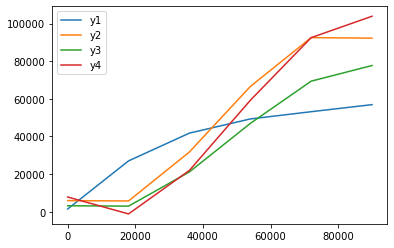

In [4]:
# Visualize the response curves (with the given datapoints)

VARIABLES = 4
INTERVALS = 5
BUDGET = 90000
width = BUDGET // INTERVALS

x = width * np.arange(INTERVALS+1)

y1 = np.around(np.array(list(map(func_inf_cam,x)), float), decimals=2)
y2 = np.around(np.array(list(map(func_mag_pag,x)), float), decimals=2)
y3 = np.around(np.array(list(map(func_dig_ins,x)), float), decimals=2)
y4 = np.around(np.array(list(map(func_dig_pro,x)), float), decimals=2)

plt.plot(x,y1,label="y1")
plt.plot(x,y2,label="y2")
plt.plot(x,y3,label="y3")
plt.plot(x,y4,label="y4")

plt.legend(loc="upper left")
plt.show()

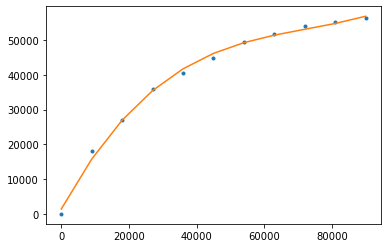

In [5]:
# Looking at polynomial fit of each channel's response curve 

x = np.array([0,9000,18000,27000,36000,45000,54000,63000,72000,81000,90000])

def get_pred(x,y):
    return np.poly1d(np.polyfit(x, y, 3))(x)

_ = plt.plot(x, y_inf_cam, '.',
             x, get_pred(x, y_inf_cam), '-')
plt.show()

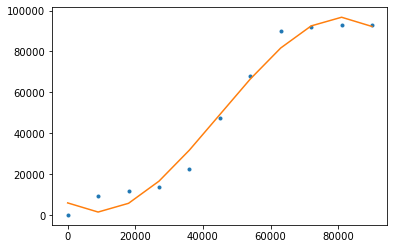

In [6]:
# Looking at polynomial fit of each channel's response curve 

_ = plt.plot(x, y_mag_pag, '.',
             x, get_pred(x, y_mag_pag), '-')
plt.show()

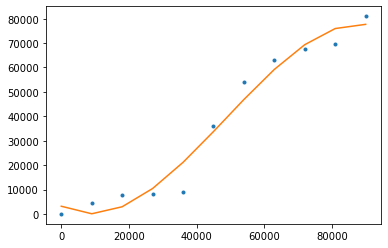

In [7]:
# Looking at polynomial fit of each channel's response curve 

_ = plt.plot(x, y_dig_ins, '.',
             x, get_pred(x, y_dig_ins), '-')
plt.show()

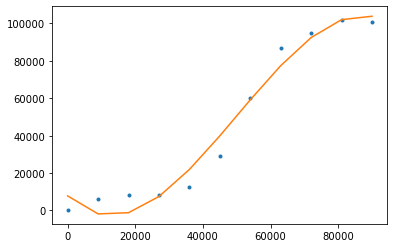

In [8]:
# Looking at polynomial fit of each channel's response curve 

_ = plt.plot(x, y_dig_pro, '.',
             x, get_pred(x, y_dig_pro), '-')
plt.show()

In [9]:
# Iterative search algorithm

VARIABLES = 4
INTERVALS = 5
MIN_WIDTH = 2

def iterate_search(max_budget1, min_budget1, max_budget2, min_budget2, \
                   max_budget3, min_budget3, max_budget4, min_budget4):
    
    first_run = True
    if first_run:
        req_min_budget1,req_min_budget2,req_min_budget3,req_min_budget4 = min_budget1,min_budget2,min_budget3,min_budget4
        req_max_budget1,req_max_budget2,req_max_budget3,req_max_budget4 = max_budget1,max_budget2,max_budget3,max_budget4

    width1 = max(1,(max_budget1 - min_budget1) // INTERVALS)
    width2 = max(1,(max_budget2 - min_budget2) // INTERVALS)
    width3 = max(1,(max_budget3 - min_budget3) // INTERVALS)
    width4 = max(1,(max_budget4 - min_budget4) // INTERVALS)
 

    x1 = min_budget1 + width1 * np.arange(INTERVALS+1)
    x2 = min_budget2 + width2 * np.arange(INTERVALS+1)
    x3 = min_budget3 + width3 * np.arange(INTERVALS+1)
    x4 = min_budget4 + width4 * np.arange(INTERVALS+1)
    
    
    y = np.zeros([INTERVALS+1 for i in range(VARIABLES)])

    for i, x1_elem in enumerate(x1):
        for j, x2_elem in enumerate(x2):
            for k, x3_elem in enumerate(x3):
                for l, x4_elem in enumerate(x4):
                    if x1_elem + x2_elem + x3_elem + x4_elem <= BUDGET:
                        y[i,j,k,l] = round(func_inf_cam(x1_elem) + func_mag_pag(x2_elem) + \
                                       func_dig_ins(x3_elem) + func_dig_pro(x4_elem), 2)


    # "pot_sols" will have all spends of all the 4 channels, where the revenue is maximum
    pot_sols = []
    
    indices = np.where(y == y.max())
    
    for p,q,r,s in zip(indices[0], indices[1], indices[2], indices[3]):
        pot_sols.append((x1[p], x2[q], x3[r], x4[s]))

    
    # "top_sol" will have the spends of 4 channels where all the spends are closer to the central budget
    top_sol = pot_sols[np.argmin([abs(i-BUDGET/2)+abs(j-BUDGET/2)+abs(k-BUDGET/2)+abs(l-BUDGET/2) for i,j,k,l in pot_sols])] 
    

    top_sol_rev = round(func_inf_cam(top_sol[0]) + func_mag_pag(top_sol[1]) + \
                        func_dig_ins(top_sol[2]) + func_dig_pro(top_sol[3]), 2)

    print(f"Spend ranges for (x1,x2,x3,x4): ({min_budget1},{max_budget1}) & ({min_budget2},{max_budget2}) & ({min_budget3},{max_budget3}) & ({min_budget4},{max_budget4})")
    print(f"Widths/granularity for (x1,x2,x3,x4): £{width1}, £{width2}, £{width3}, £{width4}")
    print(f"Maximum revenues is {top_sol_rev}, seen at spends of (x1,x2,x3,x4) = {top_sol}","\n")

    if (width1<=MIN_WIDTH and width2<=MIN_WIDTH and width3<=MIN_WIDTH and width4<=MIN_WIDTH):
        return (top_sol)
    
    first_run = False
    
    max_budget1 = min(req_max_budget1, top_sol[0] + width1, BUDGET) 
    min_budget1 = max(req_min_budget1, top_sol[0] - width1)
    
    max_budget2 = min(req_max_budget2, top_sol[1] + width2, BUDGET)
    min_budget2 = max(req_min_budget2, top_sol[1] - width2)
    
    max_budget3 = min(req_max_budget3, top_sol[2] + width3, BUDGET)
    min_budget3 = max(req_min_budget3, top_sol[2] - width3)
    
    max_budget4 = min(req_max_budget4, top_sol[3] + width4, BUDGET)
    min_budget4 = max(req_min_budget4, top_sol[3] - width4)
    
    # for the top solution seen above, we search again
    iterate_search(max_budget1, min_budget1, max_budget2, min_budget2, \
                   max_budget3, min_budget3, max_budget4, min_budget4)

In [10]:
# Total budget

BUDGET = 120000


# Budget constraints of each individual marketing channel

min_budget1 = 20000
max_budget1 = 80000

min_budget2 = 20000
max_budget2 = 40000

min_budget3 = 3000
max_budget3 = BUDGET

min_budget4 = 20000
max_budget4 = BUDGET


# Calling the function

iterate_search(max_budget1, min_budget1, max_budget2, min_budget2, \
                   max_budget3, min_budget3, max_budget4, min_budget4)

Spend ranges for (x1,x2,x3,x4): (20000,80000) & (20000,40000) & (3000,120000) & (20000,120000)
Widths/granularity for (x1,x2,x3,x4): £12000, £4000, £23400, £20000
Maximum revenues is 133783.69, seen at spends of (x1,x2,x3,x4) = (20000, 36000, 3000, 60000) 

Spend ranges for (x1,x2,x3,x4): (20000,32000) & (32000,40000) & (3000,26400) & (40000,80000)
Widths/granularity for (x1,x2,x3,x4): £2400, £1600, £4680, £8000
Maximum revenues is 134340.72, seen at spends of (x1,x2,x3,x4) = (20000, 32000, 3000, 64000) 

Spend ranges for (x1,x2,x3,x4): (20000,22400) & (32000,33600) & (3000,7680) & (56000,72000)
Widths/granularity for (x1,x2,x3,x4): £480, £320, £936, £3200
Maximum revenues is 135091.57, seen at spends of (x1,x2,x3,x4) = (20960, 33600, 3000, 62400) 

Spend ranges for (x1,x2,x3,x4): (20480,21440) & (33280,33600) & (3000,3936) & (59200,65600)
Widths/granularity for (x1,x2,x3,x4): £192, £64, £187, £1280
Maximum revenues is 135603.07, seen at spends of (x1,x2,x3,x4) = (20480, 33472, 3000, 6